<a href="https://colab.research.google.com/github/joyb05/Market-Basket-Analysis/blob/main/Market_Basket_Analysis_Groceries_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis on Groceries Dataset

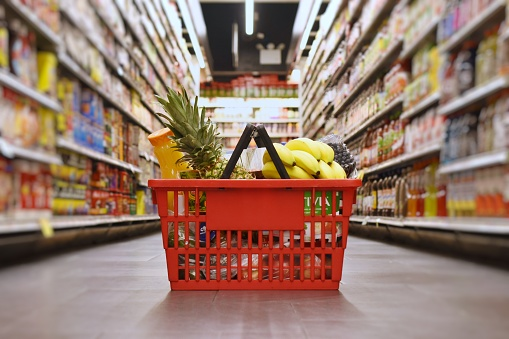

## About the dataset
### The dataset is a relational set of files describing customers' orders over time. The dataset is captured for the period of 2014 and 2015. The dataset has 38765 rows of the purchase orders of people from the grocery stores.

## Problem Statement
### The study is done on this dataset to understand the association of items with each other as well as to understand the support, lift, confidence of the items. Finding the association by conducting market basket analysis will allow for to understand which items are always in demand, which products are not doing well standalone but can perform better when clubbed and so on. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd. set_option("display.max_colwidth", None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv("/content/drive/MyDrive/Groceries_dataset.csv")

In [47]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
df.shape

(38765, 3)

In [48]:
df['Date']=pd.to_datetime(df.Date)

In [49]:
df['day'] = df['Date'].apply(lambda x:x.day)
df['month'] = df['Date'].apply(lambda x:x.month)
df['year'] = df['Date'].apply(lambda x:x.year)

In [50]:
df['date_name'] = df['Date'].dt.day_name()

In [11]:
df.head()

,Member_number,Date,itemDescription,day,month,year,date_name
0,1808,2015-07-21,tropical fruit,21,7,2015,Tuesday
1,2552,2015-05-01,whole milk,1,5,2015,Friday
2,2300,2015-09-19,pip fruit,19,9,2015,Saturday
3,1187,2015-12-12,other vegetables,12,12,2015,Saturday
4,3037,2015-01-02,whole milk,2,1,2015,Friday


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   itemDescription  38765 non-null  object
 2   day              38765 non-null  int64 
 3   month            38765 non-null  int64 
 4   year             38765 non-null  int64 
 5   date_name        38765 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.8+ MB


In [51]:
df.loc[(df['month']== 12), 'season'] = "winter"
df.loc[(df['month']>= 1) &(df['month'] <=2), 'season'] = "winter"
df.loc[(df['month']>= 3) &(df['month'] <=5), 'season'] = "spring"
df.loc[(df['month']>= 6) &(df['month'] <=8), 'season'] = "summer"
df.loc[(df['month']>= 9) &(df['month'] <=11), 'season'] = "fall"

In [15]:
df.head().sort_values('season')

,Member_number,itemDescription,day,month,year,date_name,season
2,2300,pip fruit,19,9,2015,Saturday,fall
1,2552,whole milk,1,5,2015,Friday,spring
0,1808,tropical fruit,21,7,2015,Tuesday,summer
3,1187,other vegetables,12,12,2015,Saturday,winter
4,3037,whole milk,2,1,2015,Friday,winter


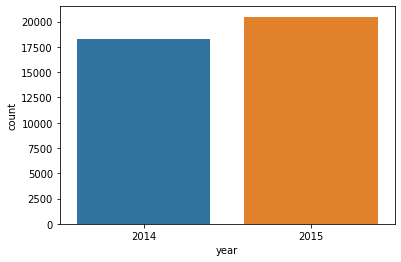

In [16]:
sns.countplot(x = 'year', data = df)

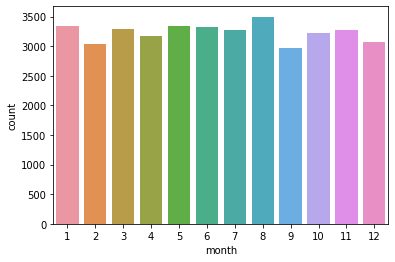

In [17]:
sns.countplot(x = 'month', data = df)

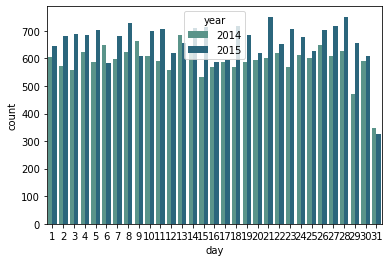

In [18]:
sns.countplot(x = 'day', data = df, hue = 'year', palette = 'crest')

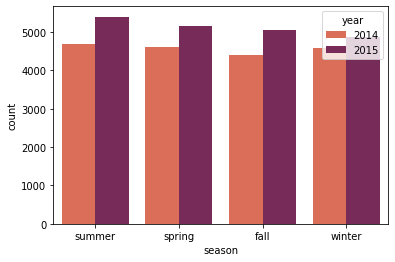

In [19]:
sns.countplot(x = 'season', data = df, hue = 'year', palette = 'rocket_r')

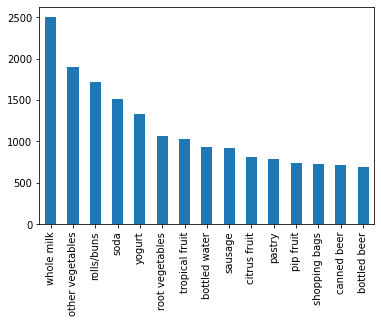

In [20]:
df['itemDescription'].value_counts()[:15].plot(kind = 'bar')
plt.show()

## Understanding the patterns in the data

In [16]:
member = df
member

,Member_number,itemDescription,day,month,year,date_name,season
0,1808,tropical fruit,21,7,2015,Tuesday,summer
1,2552,whole milk,1,5,2015,Friday,spring
2,2300,pip fruit,19,9,2015,Saturday,fall
3,1187,other vegetables,12,12,2015,Saturday,winter
4,3037,whole milk,2,1,2015,Friday,winter
...,...,...,...,...,...,...,...
38760,4471,sliced cheese,10,8,2014,Sunday,summer
38761,2022,candy,23,2,2014,Sunday,winter
38762,1097,cake bar,16,4,2014,Wednesday,spring
38763,1510,fruit/vegetable juice,12,3,2014,Wednesday,spring


In [17]:
transactions_members = [a[1]['itemDescription'].tolist() for a in list(member.groupby('Member_number'))]

In [18]:
transactions_members

[['soda',
  'canned beer',
  'sausage',
  'sausage',
  'whole milk',
  'whole milk',
  'pickled vegetables',
  'misc. beverages',
  'semi-finished bread',
  'hygiene articles',
  'yogurt',
  'pastry',
  'salty snack'],
 ['frankfurter',
  'frankfurter',
  'beef',
  'sausage',
  'whole milk',
  'soda',
  'curd',
  'white bread',
  'whole milk',
  'soda',
  'whipped/sour cream',
  'rolls/buns'],
 ['tropical fruit',
  'butter milk',
  'butter',
  'frozen vegetables',
  'sugar',
  'specialty chocolate',
  'whole milk',
  'other vegetables'],
 ['sausage',
  'root vegetables',
  'rolls/buns',
  'detergent',
  'frozen meals',
  'rolls/buns',
  'dental care',
  'rolls/buns'],
 ['other vegetables',
  'pip fruit',
  'root vegetables',
  'canned beer',
  'rolls/buns',
  'whole milk',
  'other vegetables',
  'hygiene articles',
  'whole milk',
  'whole milk',
  'frozen fish',
  'red/blush wine',
  'chocolate',
  'shopping bags',
  'dish cleaner',
  'packaged fruit/vegetables',
  'tropical fruit',
 

In [19]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [20]:
te1 = TransactionEncoder()

In [21]:
te_ary1 = te1.fit(transactions_members).transform(transactions_members)

In [22]:
te1.columns_

['Instant food products',
 'UHT-milk',
 'abrasive cleaner',
 'artif. sweetener',
 'baby cosmetics',
 'bags',
 'baking powder',
 'bathroom cleaner',
 'beef',
 'berries',
 'beverages',
 'bottled beer',
 'bottled water',
 'brandy',
 'brown bread',
 'butter',
 'butter milk',
 'cake bar',
 'candles',
 'candy',
 'canned beer',
 'canned fish',
 'canned fruit',
 'canned vegetables',
 'cat food',
 'cereals',
 'chewing gum',
 'chicken',
 'chocolate',
 'chocolate marshmallow',
 'citrus fruit',
 'cleaner',
 'cling film/bags',
 'cocoa drinks',
 'coffee',
 'condensed milk',
 'cooking chocolate',
 'cookware',
 'cream',
 'cream cheese ',
 'curd',
 'curd cheese',
 'decalcifier',
 'dental care',
 'dessert',
 'detergent',
 'dish cleaner',
 'dishes',
 'dog food',
 'domestic eggs',
 'female sanitary products',
 'finished products',
 'fish',
 'flour',
 'flower (seeds)',
 'flower soil/fertilizer',
 'frankfurter',
 'frozen chicken',
 'frozen dessert',
 'frozen fish',
 'frozen fruits',
 'frozen meals',
 'froze

In [23]:
a = te1.columns_

In [24]:
te_ary1

array([[False, False, False, ...,  True,  True, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False]])

In [25]:
transactions_members = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_members.describe()

In [26]:
transactions_members

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3893,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3894,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3895,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3896,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [27]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [28]:
import matplotlib.pyplot as plt

In [29]:
freq_items1 = apriori(transactions_members, min_support=0.001, use_colnames=True)
freq_items1.sort_values('support', ascending= False).head(10)

,support,itemsets
161,0.458184,(whole milk)
100,0.376603,(other vegetables)
119,0.349666,(rolls/buns)
135,0.313494,(soda)
162,0.282966,(yogurt)
153,0.233710,(tropical fruit)
120,0.230631,(root vegetables)
11,0.213699,(bottled water)
127,0.206003,(sausage)
5177,0.191380,"(other vegetables, whole milk)"


In [30]:
freq_items1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217551 entries, 0 to 217550
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   support   217551 non-null  float64
 1   itemsets  217551 non-null  object 
dtypes: float64(1), object(1)
memory usage: 3.3+ MB


In [31]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [32]:
freq_items_1 = (freq_items1['length'] == 1)
freq_items1[freq_items_1].sort_values('support', ascending= False).head(10)

,support,itemsets,length
161,0.458184,(whole milk),1
100,0.376603,(other vegetables),1
119,0.349666,(rolls/buns),1
135,0.313494,(soda),1
162,0.282966,(yogurt),1
153,0.233710,(tropical fruit),1
120,0.230631,(root vegetables),1
11,0.213699,(bottled water),1
127,0.206003,(sausage),1
29,0.185480,(citrus fruit),1


In [33]:
freq_items_2 = (freq_items1['length'] == 2)
freq_items1[freq_items_2].sort_values('support', ascending= False).head(10)

,support,itemsets,length
5177,0.191380,"(other vegetables, whole milk)",2
5632,0.178553,"(rolls/buns, whole milk)",2
5884,0.151103,"(soda, whole milk)",2
6034,0.150590,"(whole milk, yogurt)",2
5138,0.146742,"(other vegetables, rolls/buns)",2
5153,0.124166,"(other vegetables, soda)",2
5178,0.120318,"(other vegetables, yogurt)",2
5608,0.119805,"(rolls/buns, soda)",2
6004,0.116470,"(tropical fruit, whole milk)",2
5671,0.113135,"(root vegetables, whole milk)",2


In [34]:
freq_items_3 = (freq_items1['length'] == 3)
freq_items1[freq_items_3].sort_values('support', ascending= False).head(10)

,support,itemsets,length
44799,0.082093,"(other vegetables, rolls/buns, whole milk)",3
45097,0.071832,"(other vegetables, whole milk, yogurt)",3
44982,0.069266,"(other vegetables, soda, whole milk)",3
46983,0.065931,"(rolls/buns, whole milk, yogurt)",3
46887,0.065162,"(rolls/buns, whole milk, soda)",3
16285,0.056183,"(other vegetables, bottled water, whole milk)",3
47790,0.054387,"(soda, whole milk, yogurt)",3
44776,0.052591,"(other vegetables, rolls/buns, soda)",3
44800,0.052335,"(other vegetables, rolls/buns, yogurt)",3
45071,0.050539,"(tropical fruit, other vegetables, whole milk)",3


In [35]:
freq_items_4 = (freq_items1['length'] == 4)
freq_items1[freq_items_4].sort_values('support', ascending= False).head(10)

,support,itemsets,length
131618,0.034377,"(other vegetables, rolls/buns, whole milk, yogurt)",4
131545,0.031811,"(other vegetables, rolls/buns, whole milk, soda)",4
132100,0.027963,"(other vegetables, soda, whole milk, yogurt)",4
131491,0.026167,"(sausage, other vegetables, rolls/buns, whole milk)",4
134757,0.024628,"(soda, rolls/buns, whole milk, yogurt)",4
131920,0.023089,"(sausage, other vegetables, whole milk, yogurt)",4
76015,0.023089,"(other vegetables, rolls/buns, whole milk, bottled water)",4
134604,0.022832,"(sausage, rolls/buns, whole milk, yogurt)",4
76160,0.022063,"(other vegetables, bottled water, whole milk, yogurt)",4
76107,0.022063,"(other vegetables, bottled water, soda, whole milk)",4


In [36]:
freq_items_5 = (freq_items1['length'] == 5)
freq_items1[freq_items_5].sort_values('support', ascending= False).head(10)

,support,itemsets,length
196349,0.013597,"(whole milk, soda, other vegetables, rolls/buns, yogurt)",5
196269,0.013597,"(sausage, whole milk, other vegetables, rolls/buns, yogurt)",5
159579,0.010518,"(rolls/buns, whole milk, other vegetables, bottled water, yogurt)",5
196308,0.010005,"(whole milk, shopping bags, other vegetables, rolls/buns, yogurt)",5
196242,0.009749,"(sausage, whole milk, soda, other vegetables, rolls/buns)",5
196290,0.009749,"(whole milk, soda, shopping bags, other vegetables, rolls/buns)",5
196378,0.009749,"(tropical fruit, whole milk, other vegetables, rolls/buns, yogurt)",5
198090,0.009492,"(sausage, soda, whole milk, rolls/buns, yogurt)",5
159552,0.009492,"(rolls/buns, whole milk, soda, other vegetables, bottled water)",5
196515,0.009236,"(root vegetables, whole milk, soda, other vegetables, yogurt)",5


In [37]:
freq_items_6 = (freq_items1['length'] == 6)
freq_items1[freq_items_6].sort_values('support', ascending= False).head(10)

,support,itemsets,length
215182,0.005387,"(sausage, whole milk, soda, other vegetables, rolls/buns, yogurt)",6
209815,0.004105,"(tropical fruit, canned beer, whole milk, other vegetables, rolls/buns, yogurt)",6
215207,0.004105,"(whole milk, soda, shopping bags, other vegetables, rolls/buns, yogurt)",6
214792,0.004105,"(pastry, sausage, whole milk, other vegetables, rolls/buns, yogurt)",6
208523,0.004105,"(whole milk, soda, butter, other vegetables, rolls/buns, yogurt)",6
215146,0.003848,"(root vegetables, whole milk, soda, other vegetables, rolls/buns, yogurt)",6
215189,0.003848,"(sausage, tropical fruit, whole milk, other vegetables, rolls/buns, yogurt)",6
206171,0.003848,"(rolls/buns, whole milk, soda, other vegetables, bottled water, yogurt)",6
215131,0.003848,"(sausage, root vegetables, whole milk, other vegetables, rolls/buns, yogurt)",6
206132,0.003848,"(rolls/buns, sausage, whole milk, soda, other vegetables, bottled water)",6


In [38]:
freq_items_7 = (freq_items1['length'] == 7)
freq_items1[freq_items_7].sort_values('support', ascending= False).head(10)

,support,itemsets,length
216638,0.002565,"(rolls/buns, sausage, root vegetables, whole milk, soda, other vegetables, bottled water)",7
216654,0.002309,"(rolls/buns, sausage, whole milk, soda, other vegetables, bottled water, yogurt)",7
216659,0.002052,"(sausage, root vegetables, whole milk, soda, other vegetables, bottled water, yogurt)",7
217386,0.002052,"(pastry, sausage, root vegetables, whole milk, other vegetables, rolls/buns, yogurt)",7
216698,0.002052,"(rolls/buns, sausage, root vegetables, soda, whole milk, bottled water, yogurt)",7
216643,0.001796,"(rolls/buns, sausage, root vegetables, whole milk, other vegetables, bottled water, yogurt)",7
215685,0.001796,"(sausage, whole milk, soda, UHT-milk, other vegetables, rolls/buns, yogurt)",7
216622,0.001796,"(pip fruit, root vegetables, whole milk, soda, other vegetables, bottled water, yogurt)",7
216653,0.001796,"(rolls/buns, sausage, white bread, soda, other vegetables, bottled water, yogurt)",7
217245,0.001796,"(pastry, domestic eggs, sausage, whole milk, other vegetables, rolls/buns, yogurt)",7


In [39]:
freq_items_8 = (freq_items1['length'] == 8)
freq_items1[freq_items_8].sort_values('support', ascending= False).head(10)

,support,itemsets,length
217528,0.001539,"(rolls/buns, sausage, root vegetables, whole milk, soda, other vegetables, bottled water, yogurt)",8
217494,0.001283,"(pork, pip fruit, whole milk, soda, other vegetables, bottled water, berries, yogurt)",8
217546,0.001283,"(pastry, domestic eggs, sausage, root vegetables, whole milk, other vegetables, rolls/buns, yogurt)",8
217529,0.001283,"(rolls/buns, sausage, white bread, whole milk, soda, other vegetables, bottled water, yogurt)",8
217479,0.001026,"(rolls/buns, sausage, white bread, soda, UHT-milk, other vegetables, bottled water, yogurt)",8
217525,0.001026,"(pork, pip fruit, root vegetables, whole milk, soda, other vegetables, bottled water, yogurt)",8
217531,0.001026,"(citrus fruit, specialty chocolate, whole milk, soda, shopping bags, brown bread, other vegetables, yogurt)",8
217530,0.001026,"(pork, rolls/buns, sausage, root vegetables, soda, whole milk, bottled water, yogurt)",8
217527,0.001026,"(pork, rolls/buns, sausage, whole milk, soda, other vegetables, bottled water, yogurt)",8
217526,0.001026,"(pip fruit, sausage, root vegetables, whole milk, soda, other vegetables, bottled water, yogurt)",8


### We can observe from assessing the support on this dataset that **Whole Milk, other Vegetables, rolls/buns** were highly ordered amongst all other items.

In [40]:
rules1 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules1.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(UHT-milk),(Instant food products),0.078502,0.015393,0.001026,0.013072,0.849237,-0.000182,0.997649
1,(Instant food products),(UHT-milk),0.015393,0.078502,0.001026,0.066667,0.849237,-0.000182,0.987320
2,(beef),(Instant food products),0.119548,0.015393,0.002309,0.019313,1.254721,0.000469,1.003998
3,(Instant food products),(beef),0.015393,0.119548,0.002309,0.150000,1.254721,0.000469,1.035825
4,(beverages),(Instant food products),0.062083,0.015393,0.001026,0.016529,1.073829,0.000071,1.001156
5,(Instant food products),(beverages),0.015393,0.062083,0.001026,0.066667,1.073829,0.000071,1.004911
6,(bottled beer),(Instant food products),0.158799,0.015393,0.002822,0.017771,1.154496,0.000378,1.002421
7,(Instant food products),(bottled beer),0.015393,0.158799,0.002822,0.183333,1.154496,0.000378,1.030042
8,(bottled water),(Instant food products),0.213699,0.015393,0.002822,0.013205,0.857903,-0.000467,0.997784
9,(Instant food products),(bottled water),0.015393,0.213699,0.002822,0.183333,0.857903,-0.000467,0.962817


In [41]:
top_support = rules1.sort_values('support', ascending= False)
top_support.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10026,(other vegetables),(whole milk),0.376603,0.458184,0.191380,0.508174,1.109106,0.018827,1.101643
10027,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564
10936,(rolls/buns),(whole milk),0.349666,0.458184,0.178553,0.510638,1.114484,0.018342,1.107190
10937,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592
11441,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310
11440,(soda),(whole milk),0.313494,0.458184,0.151103,0.481997,1.051973,0.007465,1.045971
11741,(yogurt),(whole milk),0.282966,0.458184,0.150590,0.532185,1.161510,0.020940,1.158185
11740,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076
9948,(other vegetables),(rolls/buns),0.376603,0.349666,0.146742,0.389646,1.114335,0.015056,1.065502
9949,(rolls/buns),(other vegetables),0.349666,0.376603,0.146742,0.419663,1.114335,0.015056,1.074197


In [42]:
top_confidence = rules1.sort_values('confidence', ascending= False)
top_confidence.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1574483,"(frankfurter, beef, bottled water, chocolate)",(root vegetables),0.001026,0.230631,0.001026,1.0,4.335929,0.000790,inf
4060948,"(newspapers, root vegetables, canned beer, soda, meat)",(whole milk),0.001026,0.458184,0.001026,1.0,2.182531,0.000556,inf
4628794,"(pastry, coffee, soda, shopping bags, other vegetables, rolls/buns)",(whole milk),0.001026,0.458184,0.001026,1.0,2.182531,0.000556,inf
3449382,"(whipped/sour cream, coffee, soda, beef, rolls/buns)",(other vegetables),0.001026,0.376603,0.001026,1.0,2.655313,0.000640,inf
3449443,"(other vegetables, coffee, soda, beef, rolls/buns)",(whole milk),0.001283,0.458184,0.001283,1.0,2.182531,0.000695,inf
4536564,"(citrus fruit, root vegetables, whole milk, other vegetables, bottled water, yogurt)",(rolls/buns),0.001026,0.349666,0.001026,1.0,2.859868,0.000667,inf
4536561,"(citrus fruit, root vegetables, bottled water, other vegetables, rolls/buns, yogurt)",(whole milk),0.001026,0.458184,0.001026,1.0,2.182531,0.000556,inf
1870341,"(sugar, bottled beer, sausage, citrus fruit)",(tropical fruit),0.001026,0.233710,0.001026,1.0,4.278814,0.000786,inf
3449504,"(whipped/sour cream, other vegetables, coffee, beef, rolls/buns)",(whole milk),0.001539,0.458184,0.001539,1.0,2.182531,0.000834,inf
291778,"(UHT-milk, frozen meals, newspapers)",(whole milk),0.001026,0.458184,0.001026,1.0,2.182531,0.000556,inf


### From the products reflecting high confidence we can observe that **Whole milk and other vegetables** were choosen after other combination of products. 

In [43]:
top_lift = rules1.sort_values('lift', ascending= False)
top_lift.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4626970,"(pork, meat, coffee)","(root vegetables, long life bakery product, whole milk, domestic eggs)",0.002052,0.001539,0.001026,0.500000,324.833333,0.001023,1.996921
4626955,"(root vegetables, long life bakery product, whole milk, domestic eggs)","(pork, meat, coffee)",0.001539,0.002052,0.001026,0.666667,324.833333,0.001023,2.993843
4626936,"(long life bakery product, pork, whole milk, domestic eggs)","(root vegetables, meat, coffee)",0.001539,0.002565,0.001026,0.666667,259.866667,0.001022,2.992304
4626989,"(root vegetables, meat, coffee)","(long life bakery product, pork, whole milk, domestic eggs)",0.002565,0.001539,0.001026,0.400000,259.866667,0.001022,1.664101
4626958,"(root vegetables, whole milk, coffee, meat)","(long life bakery product, pork, domestic eggs)",0.001796,0.002565,0.001026,0.571429,222.742857,0.001022,2.327347
4626967,"(long life bakery product, pork, domestic eggs)","(root vegetables, whole milk, coffee, meat)",0.002565,0.001796,0.001026,0.400000,222.742857,0.001022,1.663674
4626948,"(coffee, whole milk, domestic eggs, root vegetables)","(long life bakery product, pork, meat)",0.003335,0.001539,0.001026,0.307692,199.897436,0.001021,1.442221
4626977,"(long life bakery product, pork, meat)","(coffee, whole milk, domestic eggs, root vegetables)",0.001539,0.003335,0.001026,0.666667,199.897436,0.001021,2.989995
4454857,"(beef, meat, domestic eggs)","(long life bakery product, whipped/sour cream, rolls/buns, whole milk)",0.001539,0.003592,0.001026,0.666667,185.619048,0.001021,2.989225
4676392,"(other vegetables, whole milk, chocolate, white bread)","(pork, pip fruit, bottled water, rolls/buns)",0.001796,0.003079,0.001026,0.571429,185.619048,0.001021,2.326150


### From the lift score we can understand that **Eggs, root vegetables, bakery products, milk, coffee, pork and meat** kept together will increase the business of these products but the combination of buying these products together was found to very low. Thus, more emphasis needs to be provided on these combinations of product as these have the potential to boost the business.

## Buying pattern during the **Winter** season

In [44]:
df1 = df['season'] == 'winter'

In [52]:
winter = df.loc[df1].sort_values('Date', ascending = True)

In [53]:
transactions_six = [a[1]['itemDescription'].tolist() for a in list(winter.groupby('Member_number'))]

In [54]:
te1 = TransactionEncoder()

In [55]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [56]:
a = te1.columns_

In [57]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [58]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [59]:
freq_items1 = apriori(transactions_six, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.009559,(Instant food products)
1,0.027431,(UHT-milk)
2,0.001663,(abrasive cleaner)
3,0.003325,(artif. sweetener)
4,0.009144,(baking powder)
5,0.053200,(beef)
6,0.032419,(berries)


In [60]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [61]:
freq_items1.head()

,support,itemsets,length
0,0.009559,(Instant food products),1
1,0.027431,(UHT-milk),1
2,0.001663,(abrasive cleaner),1
3,0.003325,(artif. sweetener),1
4,0.009144,(baking powder),1


In [62]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(Instant food products),0.065254,0.009559,0.001247,0.019108,1.998892,0.000623,1.009735
1,(Instant food products),(bottled beer),0.009559,0.065254,0.001247,0.130435,1.998892,0.000623,1.074958
2,(bottled water),(Instant food products),0.091438,0.009559,0.001247,0.013636,1.426482,0.000373,1.004133
3,(Instant food products),(bottled water),0.009559,0.091438,0.001247,0.130435,1.426482,0.000373,1.044846
4,(butter),(Instant food products),0.054447,0.009559,0.001247,0.022901,2.395619,0.000726,1.013654
5,(Instant food products),(butter),0.009559,0.054447,0.001247,0.130435,2.395619,0.000726,1.087386
6,(canned beer),(Instant food products),0.063175,0.009559,0.001247,0.019737,2.064645,0.000643,1.010382
7,(Instant food products),(canned beer),0.009559,0.063175,0.001247,0.130435,2.064645,0.000643,1.077348
8,(citrus fruit),(Instant food products),0.072735,0.009559,0.001663,0.022857,2.391056,0.000967,1.013609
9,(Instant food products),(citrus fruit),0.009559,0.072735,0.001663,0.173913,2.391056,0.000967,1.122479


In [63]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2937,(whole milk),(other vegetables),0.206151,0.179135,0.036575,0.177419,0.990420,-0.000354,0.997914
2936,(other vegetables),(whole milk),0.179135,0.206151,0.036575,0.204176,0.990420,-0.000354,0.997518
3432,(soda),(whole milk),0.139235,0.206151,0.036160,0.259701,1.259762,0.007456,1.072336
3433,(whole milk),(soda),0.206151,0.139235,0.036160,0.175403,1.259762,0.007456,1.043861
2893,(rolls/buns),(other vegetables),0.160017,0.179135,0.034913,0.218182,1.217971,0.006248,1.049943
2892,(other vegetables),(rolls/buns),0.179135,0.160017,0.034913,0.194896,1.217971,0.006248,1.043322
3236,(rolls/buns),(whole milk),0.160017,0.206151,0.034497,0.215584,1.045758,0.001509,1.012026
3237,(whole milk),(rolls/buns),0.206151,0.160017,0.034497,0.167339,1.045758,0.001509,1.008794
3544,(whole milk),(yogurt),0.206151,0.115544,0.029510,0.143145,1.238875,0.005690,1.032212
3545,(yogurt),(whole milk),0.115544,0.206151,0.029510,0.255396,1.238875,0.005690,1.066135


In [64]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14121,"(whole milk, pastry, domestic eggs)",(other vegetables),0.001663,0.179135,0.001663,1.0,5.582367,0.001365,inf
13967,"(dessert, fruit/vegetable juice, yogurt)",(other vegetables),0.001247,0.179135,0.001247,1.0,5.582367,0.001024,inf
7313,"(citrus fruit, ham)",(soda),0.001247,0.139235,0.001247,1.0,7.182090,0.001073,inf
13811,"(root vegetables, tropical fruit, citrus fruit)",(whole milk),0.001247,0.206151,0.001247,1.0,4.850806,0.000990,inf
13852,"(sugar, citrus fruit, soda)",(whole milk),0.001247,0.206151,0.001247,1.0,4.850806,0.000990,inf
13853,"(sugar, citrus fruit, whole milk)",(soda),0.001247,0.139235,0.001247,1.0,7.182090,0.001073,inf
13881,"(other vegetables, domestic eggs, coffee)",(rolls/buns),0.001247,0.160017,0.001247,1.0,6.249351,0.001047,inf
6995,"(chicken, specialty chocolate)",(whole milk),0.001247,0.206151,0.001247,1.0,4.850806,0.000990,inf
6976,"(seasonal products, chicken)",(whole milk),0.001247,0.206151,0.001247,1.0,4.850806,0.000990,inf
13897,"(soda, coffee, newspapers)",(other vegetables),0.001247,0.179135,0.001247,1.0,5.582367,0.001024,inf


In [65]:
top_lift2 = rules2.sort_values('lift', ascending= False)
top_lift2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15314,"(shopping bags, newspapers)","(rolls/buns, soda, butter)",0.004988,0.001663,0.001247,0.250000,150.375000,0.001239,1.331117
15253,"(canned beer, fruit/vegetable juice)","(rolls/buns, whole milk, butter)",0.003325,0.002494,0.001247,0.375000,150.375000,0.001239,1.596010
15311,"(rolls/buns, soda, butter)","(shopping bags, newspapers)",0.001663,0.004988,0.001247,0.750000,150.375000,0.001239,3.980050
15252,"(rolls/buns, whole milk, butter)","(canned beer, fruit/vegetable juice)",0.002494,0.003325,0.001247,0.500000,150.375000,0.001239,1.993350
12723,"(pork, bottled water)","(waffles, frozen vegetables)",0.005403,0.001663,0.001247,0.230769,138.807692,0.001238,1.297839
12726,"(waffles, frozen vegetables)","(pork, bottled water)",0.001663,0.005403,0.001247,0.750000,138.807692,0.001238,3.978387
15342,"(canned beer, whole milk, soda)","(citrus fruit, domestic eggs)",0.002078,0.004572,0.001247,0.600000,131.236364,0.001237,2.488570
15343,"(citrus fruit, domestic eggs)","(canned beer, whole milk, soda)",0.004572,0.002078,0.001247,0.272727,131.236364,0.001237,1.372143
15247,"(rolls/buns, whole milk, fruit/vegetable juice)","(canned beer, butter)",0.002909,0.004156,0.001247,0.428571,103.114286,0.001235,1.742727
12727,"(bottled water, frozen vegetables)","(pork, waffles)",0.004156,0.002909,0.001247,0.300000,103.114286,0.001235,1.424415


## The buying pattern in Winters changes as we can see, whole milk and soda is found to be performing better with comparison to whole milk and other vegetables. Can beers, soda, butter, rolls/buns, citric fruits buying increases in this season.

## Buying pattern during the **Spring** season

In [66]:
df1 = df['season'] == 'spring'

In [67]:
spring = df.loc[df1].sort_values('Date', ascending = True)

In [68]:
transactions_six = [a[1]['itemDescription'].tolist() for a in list(spring.groupby('Member_number'))]

In [69]:
te1 = TransactionEncoder()

In [70]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [71]:
a = te1.columns_

In [72]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [73]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [74]:
freq_items1 = apriori(transactions_six, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.005705,(Instant food products)
1,0.036675,(UHT-milk)
2,0.002852,(abrasive cleaner)
3,0.003667,(artif. sweetener)
4,0.014670,(baking powder)
5,0.047270,(beef)
6,0.028525,(berries)


In [75]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [76]:
freq_items1.head()

,support,itemsets,length
0,0.005705,(Instant food products),1
1,0.036675,(UHT-milk),1
2,0.002852,(abrasive cleaner),1
3,0.003667,(artif. sweetener),1
4,0.014670,(baking powder),1


In [77]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(Instant food products),0.037490,0.005705,0.00163,0.043478,7.621118,0.001416,1.039490
1,(Instant food products),(chocolate),0.005705,0.037490,0.00163,0.285714,7.621118,0.001416,1.347514
2,(pastry),(Instant food products),0.078240,0.005705,0.00163,0.020833,3.651786,0.001184,1.015450
3,(Instant food products),(pastry),0.005705,0.078240,0.00163,0.285714,3.651786,0.001184,1.290465
4,(root vegetables),(Instant food products),0.088427,0.005705,0.00163,0.018433,3.231073,0.001126,1.012967
5,(Instant food products),(root vegetables),0.005705,0.088427,0.00163,0.285714,3.231073,0.001126,1.276202
6,(soda),(Instant food products),0.139772,0.005705,0.00163,0.011662,2.044148,0.000833,1.006027
7,(Instant food products),(soda),0.005705,0.139772,0.00163,0.285714,2.044148,0.000833,1.204319
8,(tropical fruit),(Instant food products),0.111247,0.005705,0.00163,0.014652,2.568289,0.000995,1.009080
9,(Instant food products),(tropical fruit),0.005705,0.111247,0.00163,0.285714,2.568289,0.000995,1.244254


In [78]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3128,(other vegetables),(whole milk),0.165037,0.233089,0.046455,0.281481,1.207615,0.007987,1.067351
3129,(whole milk),(other vegetables),0.233089,0.165037,0.046455,0.199301,1.207615,0.007987,1.042793
3757,(yogurt),(whole milk),0.136919,0.233089,0.037082,0.270833,1.161932,0.005168,1.051764
3756,(whole milk),(yogurt),0.233089,0.136919,0.037082,0.159091,1.161932,0.005168,1.026366
3464,(rolls/buns),(whole milk),0.156072,0.233089,0.035045,0.224543,0.963337,-0.001334,0.988980
3465,(whole milk),(rolls/buns),0.233089,0.156072,0.035045,0.150350,0.963337,-0.001334,0.993265
3647,(soda),(whole milk),0.139772,0.233089,0.034637,0.247813,1.063172,0.002058,1.019576
3646,(whole milk),(soda),0.233089,0.139772,0.034637,0.148601,1.063172,0.002058,1.010371
3729,(whole milk),(tropical fruit),0.233089,0.111247,0.031785,0.136364,1.225774,0.005854,1.029082
3728,(tropical fruit),(whole milk),0.111247,0.233089,0.031785,0.285714,1.225774,0.005854,1.073676


In [79]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15600,"(sausage, candy, other vegetables)",(pork),0.001222,0.055012,0.001222,1.0,18.177778,0.001155,inf
18613,"(bottled beer, citrus fruit, whole milk)","(rolls/buns, yogurt)",0.001222,0.022412,0.001222,1.0,44.618182,0.001195,inf
19149,"(sausage, rolls/buns, whole milk, soda)",(other vegetables),0.001630,0.165037,0.001630,1.0,6.059259,0.001361,inf
14339,"(other vegetables, berries, shopping bags)",(whole milk),0.001630,0.233089,0.001630,1.0,4.290210,0.001250,inf
19151,"(sausage, other vegetables, rolls/buns, soda)",(whole milk),0.001630,0.233089,0.001630,1.0,4.290210,0.001250,inf
19152,"(other vegetables, rolls/buns, whole milk, soda)",(sausage),0.001630,0.099022,0.001630,1.0,10.098765,0.001469,inf
18921,"(curd, rolls/buns, yogurt)","(sausage, other vegetables)",0.001222,0.019152,0.001222,1.0,52.212766,0.001199,inf
18912,"(curd, other vegetables, rolls/buns, yogurt)",(sausage),0.001222,0.099022,0.001222,1.0,10.098765,0.001101,inf
18617,"(bottled beer, citrus fruit, yogurt)","(rolls/buns, whole milk)",0.001222,0.035045,0.001222,1.0,28.534884,0.001180,inf
18910,"(sausage, curd, rolls/buns, yogurt)",(other vegetables),0.001222,0.165037,0.001222,1.0,6.059259,0.001021,inf


In [80]:
top_confidence2 = rules2.sort_values('lift', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19323,"(tropical fruit, margarine, whole milk)","(sausage, curd, other vegetables)",0.002852,0.003260,0.001222,0.428571,131.464286,0.001213,1.744295
19334,"(sausage, curd, other vegetables)","(tropical fruit, margarine, whole milk)",0.003260,0.002852,0.001222,0.375000,131.464286,0.001213,1.595436
19320,"(tropical fruit, sausage, whole milk)","(curd, margarine, other vegetables)",0.007742,0.001222,0.001222,0.157895,129.157895,0.001213,1.186048
19337,"(curd, margarine, other vegetables)","(tropical fruit, sausage, whole milk)",0.001222,0.007742,0.001222,1.000000,129.157895,0.001213,inf
19325,"(tropical fruit, margarine, other vegetables)","(sausage, curd, whole milk)",0.002037,0.004890,0.001222,0.600000,122.700000,0.001213,2.487775
19332,"(sausage, curd, whole milk)","(tropical fruit, margarine, other vegetables)",0.004890,0.002037,0.001222,0.250000,122.700000,0.001213,1.330617
19327,"(tropical fruit, other vegetables, whole milk)","(sausage, curd, margarine)",0.006520,0.001630,0.001222,0.187500,115.031250,0.001212,1.228763
19330,"(sausage, curd, margarine)","(tropical fruit, other vegetables, whole milk)",0.001630,0.006520,0.001222,0.750000,115.031250,0.001212,3.973920
19322,"(tropical fruit, sausage, other vegetables)","(curd, margarine, whole milk)",0.004482,0.002445,0.001222,0.272727,111.545455,0.001212,1.371638
19336,"(margarine, whole milk, other vegetables)","(tropical fruit, curd, sausage)",0.004482,0.002445,0.001222,0.272727,111.545455,0.001212,1.371638


## The buying pattern in Spring changes as we can see, whole milk, other vegetables, yogurt, soda, fruits products are found to have the highest support. Sausage, candy, other vegetables products have higher confidence and lift but need to encourage buying this product as these products can provide boost to business.

## Buying pattern during the **Summer** season

In [81]:
df1 = df['season'] == 'summer'

In [82]:
summer = df.loc[df1].sort_values('Date', ascending = True)

In [83]:
transactions_six = [a[1]['itemDescription'].tolist() for a in list(summer.groupby('Member_number'))]

In [84]:
te1 = TransactionEncoder()

In [85]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [86]:
a = te1.columns_

In [87]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [88]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [89]:
freq_items1 = apriori(transactions_six, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.005754,(Instant food products)
1,0.037402,(UHT-milk)
2,0.002466,(abrasive cleaner)
3,0.003288,(artif. sweetener)
4,0.013975,(baking powder)
5,0.002466,(bathroom cleaner)
6,0.054665,(beef)


In [90]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [91]:
freq_items1.head()

,support,itemsets,length
0,0.005754,(Instant food products),1
1,0.037402,(UHT-milk),1
2,0.002466,(abrasive cleaner),1
3,0.003288,(artif. sweetener),1
4,0.013975,(baking powder),1


In [92]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled beer),(Instant food products),0.077271,0.005754,0.001233,0.015957,2.773176,0.000788,1.010369
1,(Instant food products),(bottled beer),0.005754,0.077271,0.001233,0.214286,2.773176,0.000788,1.174383
2,(rolls/buns),(Instant food products),0.161940,0.005754,0.002055,0.012690,2.205402,0.001123,1.007025
3,(Instant food products),(rolls/buns),0.005754,0.161940,0.002055,0.357143,2.205402,0.001123,1.303649
4,(root vegetables),(Instant food products),0.106864,0.005754,0.001233,0.011538,2.005220,0.000618,1.005852
5,(Instant food products),(root vegetables),0.005754,0.106864,0.001233,0.214286,2.005220,0.000618,1.136719
6,(soda),(Instant food products),0.146321,0.005754,0.001644,0.011236,1.952648,0.000802,1.005544
7,(Instant food products),(soda),0.005754,0.146321,0.001644,0.285714,1.952648,0.000802,1.195150
8,(UHT-milk),(beef),0.037402,0.054665,0.002055,0.054945,1.005123,0.000010,1.000296
9,(beef),(UHT-milk),0.054665,0.037402,0.002055,0.037594,1.005123,0.000010,1.000199


In [93]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3308,(other vegetables),(whole milk),0.190711,0.235512,0.046034,0.241379,1.024914,0.001119,1.007735
3309,(whole milk),(other vegetables),0.235512,0.190711,0.046034,0.195462,1.024914,0.001119,1.005906
3648,(rolls/buns),(whole milk),0.161940,0.235512,0.040691,0.251269,1.066907,0.002552,1.021045
3649,(whole milk),(rolls/buns),0.235512,0.161940,0.040691,0.172775,1.066907,0.002552,1.013098
3254,(other vegetables),(rolls/buns),0.190711,0.161940,0.036991,0.193966,1.197762,0.006108,1.039732
3255,(rolls/buns),(other vegetables),0.161940,0.190711,0.036991,0.228426,1.197762,0.006108,1.048881
3274,(other vegetables),(soda),0.190711,0.146321,0.032881,0.172414,1.178322,0.004976,1.031528
3275,(soda),(other vegetables),0.146321,0.190711,0.032881,0.224719,1.178322,0.004976,1.043865
3975,(yogurt),(whole milk),0.124538,0.235512,0.029182,0.234323,0.994954,-0.000148,0.998448
3866,(whole milk),(soda),0.235512,0.146321,0.029182,0.123909,0.846829,-0.005278,0.974418


In [94]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4969,"(berries, hamburger meat)",(whole milk),0.001233,0.235512,0.001233,1.0,4.246073,0.000943,inf
22500,"(sausage, shopping bags, chocolate)",(rolls/buns),0.001233,0.161940,0.001233,1.0,6.175127,0.001033,inf
23173,"(dessert, yogurt, newspapers)",(rolls/buns),0.001233,0.161940,0.001233,1.0,6.175127,0.001033,inf
25047,"(root vegetables, other vegetables, sugar)",(whole milk),0.001233,0.235512,0.001233,1.0,4.246073,0.000943,inf
19378,"(bottled beer, sausage, citrus fruit)",(other vegetables),0.001233,0.190711,0.001233,1.0,5.243534,0.000998,inf
26079,"(sausage, rolls/buns, whole milk, domestic eggs)",(other vegetables),0.001233,0.190711,0.001233,1.0,5.243534,0.000998,inf
26080,"(sausage, other vegetables, rolls/buns, domestic eggs)",(whole milk),0.001233,0.235512,0.001233,1.0,4.246073,0.000943,inf
19365,"(bottled beer, pip fruit, chocolate)",(tropical fruit),0.001233,0.097000,0.001233,1.0,10.309322,0.001113,inf
19364,"(tropical fruit, pip fruit, chocolate)",(bottled beer),0.001233,0.077271,0.001233,1.0,12.941489,0.001138,inf
4746,"(beef, pickled vegetables)",(yogurt),0.001233,0.124538,0.001233,1.0,8.029703,0.001079,inf


In [95]:
top_leverage2 = rules2.sort_values('lift', ascending= False)
top_leverage2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25917,"(chicken, newspapers)","(rolls/buns, soda, bottled water)",0.002877,0.002466,0.001233,0.428571,173.785714,0.001226,1.745684
25908,"(rolls/buns, soda, bottled water)","(chicken, newspapers)",0.002466,0.002877,0.001233,0.500000,173.785714,0.001226,1.994246
22137,"(sausage, other vegetables, canned beer)",(rum),0.002055,0.003699,0.001233,0.600000,162.200000,0.001225,2.490752
22144,(rum),"(sausage, other vegetables, canned beer)",0.003699,0.002055,0.001233,0.333333,162.200000,0.001225,1.496917
26003,"(pork, frozen meals)","(sausage, bottled water, whole milk)",0.002466,0.003288,0.001233,0.500000,152.062500,0.001225,1.993424
26002,"(sausage, bottled water, whole milk)","(pork, frozen meals)",0.003288,0.002466,0.001233,0.375000,152.062500,0.001225,1.596054
25996,"(sausage, pork, whole milk)","(bottled water, frozen meals)",0.003699,0.002466,0.001233,0.333333,135.166667,0.001224,1.496301
26009,"(bottled water, frozen meals)","(sausage, pork, whole milk)",0.002466,0.003699,0.001233,0.500000,135.166667,0.001224,1.992602
25999,"(sausage, whole milk, frozen meals)","(pork, bottled water)",0.002055,0.005343,0.001233,0.600000,112.292308,0.001222,2.486642
26006,"(pork, bottled water)","(sausage, whole milk, frozen meals)",0.005343,0.002055,0.001233,0.230769,112.292308,0.001222,1.297328


## The buying pattern in Summer changes as we can see, whole milk, other vegetables, soda, rolls/buns products are found to have the highest support. hamburger meat, beverages, soda, wipped/sour cream products have higher confidence and lift but need to encourage buying this product as these products can provide boost to business.

## Buying pattern during the **Fall** season

In [96]:
df1 = df['season'] == 'fall'

In [97]:
fall = df.loc[df1].sort_values('Date', ascending = True)

In [98]:
transactions_six = [a[1]['itemDescription'].tolist() for a in list(fall.groupby('Member_number'))]

In [99]:
te1 = TransactionEncoder()

In [100]:
te_ary1 = te1.fit(transactions_six).transform(transactions_six)

In [101]:
a = te1.columns_

In [102]:
transactions_six = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_six.describe()

In [103]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [104]:
freq_items1 = apriori(transactions_six, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.003704,(Instant food products)
1,0.027572,(UHT-milk)
2,0.002058,(abrasive cleaner)
3,0.001646,(artif. sweetener)
4,0.011934,(baking powder)
5,0.004115,(bathroom cleaner)
6,0.050617,(beef)


In [105]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [106]:
freq_items1.head()

,support,itemsets,length
0,0.003704,(Instant food products),1
1,0.027572,(UHT-milk),1
2,0.002058,(abrasive cleaner),1
3,0.001646,(artif. sweetener),1
4,0.011934,(baking powder),1


In [107]:
rules2 = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(Instant food products),0.225926,0.003704,0.001235,0.005464,1.475410,0.000398,1.001770
1,(Instant food products),(whole milk),0.003704,0.225926,0.001235,0.333333,1.475410,0.000398,1.161111
2,(UHT-milk),(beef),0.027572,0.050617,0.001235,0.044776,0.884601,-0.000161,0.993885
3,(beef),(UHT-milk),0.050617,0.027572,0.001235,0.024390,0.884601,-0.000161,0.996739
4,(UHT-milk),(beverages),0.027572,0.025103,0.002469,0.089552,3.567409,0.001777,1.070789
5,(beverages),(UHT-milk),0.025103,0.027572,0.002469,0.098361,3.567409,0.001777,1.078511
6,(UHT-milk),(bottled beer),0.027572,0.068313,0.002469,0.089552,1.310915,0.000586,1.023329
7,(bottled beer),(UHT-milk),0.068313,0.027572,0.002469,0.036145,1.310915,0.000586,1.008894
8,(UHT-milk),(bottled water),0.027572,0.086831,0.001646,0.059701,0.687557,-0.000748,0.971148
9,(bottled water),(UHT-milk),0.086831,0.027572,0.001646,0.018957,0.687557,-0.000748,0.991219


In [108]:
top_support2 = rules2.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2951,(whole milk),(other vegetables),0.225926,0.177366,0.042387,0.187614,1.057776,0.002315,1.012614
2950,(other vegetables),(whole milk),0.177366,0.225926,0.042387,0.238979,1.057776,0.002315,1.017152
3271,(whole milk),(rolls/buns),0.225926,0.165844,0.037860,0.167577,1.010454,0.000392,1.002083
3270,(rolls/buns),(whole milk),0.165844,0.225926,0.037860,0.228288,1.010454,0.000392,1.003061
3451,(soda),(whole milk),0.144444,0.225926,0.030864,0.213675,0.945776,-0.001770,0.984420
3450,(whole milk),(soda),0.225926,0.144444,0.030864,0.136612,0.945776,-0.001770,0.990928
3249,(soda),(rolls/buns),0.144444,0.165844,0.027572,0.190883,1.150983,0.003617,1.030947
3248,(rolls/buns),(soda),0.165844,0.144444,0.027572,0.166253,1.150983,0.003617,1.026157
3543,(yogurt),(whole milk),0.133745,0.225926,0.027160,0.203077,0.898865,-0.003056,0.971328
3542,(whole milk),(yogurt),0.225926,0.133745,0.027160,0.120219,0.898865,-0.003056,0.984625


In [109]:
top_confidence2 = rules2.sort_values('confidence', ascending= False)
top_confidence2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7497,"(pickled vegetables, chocolate)",(whole milk),0.001235,0.225926,0.001235,1.0,4.426230,0.000956,inf
14743,"(pork, grapes, sliced cheese)",(sausage),0.001235,0.078601,0.001235,1.0,12.722513,0.001138,inf
14742,"(sausage, grapes, sliced cheese)",(pork),0.001235,0.062140,0.001235,1.0,16.092715,0.001158,inf
7094,"(chewing gum, chicken)",(rolls/buns),0.001235,0.165844,0.001235,1.0,6.029777,0.001030,inf
13691,"(butter milk, frankfurter, whole milk)",(citrus fruit),0.001235,0.079012,0.001235,1.0,12.656250,0.001137,inf
13690,"(butter milk, frankfurter, citrus fruit)",(whole milk),0.001235,0.225926,0.001235,1.0,4.426230,0.000956,inf
13342,"(bottled water, soda, coffee)",(whole milk),0.001235,0.225926,0.001235,1.0,4.426230,0.000956,inf
12991,"(bottled beer, rolls/buns, chocolate)",(whole milk),0.001235,0.225926,0.001235,1.0,4.426230,0.000956,inf
14740,"(sausage, pork, grapes)",(sliced cheese),0.001235,0.025514,0.001235,1.0,39.193548,0.001203,inf
15774,"(grapes, rolls/buns, whole milk, other vegetables)",(pork),0.001235,0.062140,0.001235,1.0,16.092715,0.001158,inf


In [110]:
top_leverage2 = rules2.sort_values('lift', ascending= False)
top_leverage2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14744,"(sausage, pork)","(grapes, sliced cheese)",0.005350,0.001646,0.001235,0.230769,140.192308,0.001226,1.297860
14749,"(grapes, sliced cheese)","(sausage, pork)",0.001646,0.005350,0.001235,0.750000,140.192308,0.001226,3.978601
1953,(honey),(flower (seeds)),0.002058,0.004938,0.001235,0.600000,121.500000,0.001224,2.487654
1952,(flower (seeds)),(honey),0.004938,0.002058,0.001235,0.250000,121.500000,0.001224,1.330590
14745,"(sausage, grapes)","(pork, sliced cheese)",0.003704,0.003292,0.001235,0.333333,101.250000,0.001222,1.495062
14748,"(pork, sliced cheese)","(sausage, grapes)",0.003292,0.003704,0.001235,0.375000,101.250000,0.001222,1.594074
14537,"(onions, rolls/buns)","(pork, frozen vegetables)",0.004527,0.002881,0.001235,0.272727,94.675325,0.001222,1.371039
14536,"(pork, frozen vegetables)","(onions, rolls/buns)",0.002881,0.004527,0.001235,0.428571,94.675325,0.001222,1.742078
14746,"(sausage, sliced cheese)","(pork, grapes)",0.004527,0.003292,0.001235,0.272727,82.840909,0.001220,1.370473
14747,"(pork, grapes)","(sausage, sliced cheese)",0.003292,0.004527,0.001235,0.375000,82.840909,0.001220,1.592757


## The buying pattern in Fall changes as we can see whole milk, other vegetables, soda, rolls/buns products are found to have the highest support. pip fruit, canned beer, frankfurter, sausage have higher confidence and lift but need to encourage buying this product as these products can provide boost to business. 

## Buying pattern during the **Weekday** season

In [111]:
df.head()

,Member_number,Date,itemDescription,day,month,year,date_name,season
0,1808,2015-07-21,tropical fruit,21,7,2015,Tuesday,summer
1,2552,2015-05-01,whole milk,1,5,2015,Friday,spring
2,2300,2015-09-19,pip fruit,19,9,2015,Saturday,fall
3,1187,2015-12-12,other vegetables,12,12,2015,Saturday,winter
4,3037,2015-01-02,whole milk,2,1,2015,Friday,winter


In [112]:
df.loc[(df['date_name']== 'Monday'), 'Weekend/day'] = "Weekday"
df.loc[(df['date_name']== 'Tuesday'), 'Weekend/day'] = "Weekday"
df.loc[(df['date_name']== 'Wednesday'), 'Weekend/day'] = "Weekday"
df.loc[(df['date_name']== 'Thrusday'), 'Weekend/day'] = "Weekday"
df.loc[(df['date_name']== 'Friday'), 'Weekend/day'] = "Weekday"
df.loc[(df['date_name']== 'Saturday'), 'Weekend/day'] = "Weekend"
df.loc[(df['date_name']== 'Sunday'), 'Weekend/day'] = "Weekend"

In [113]:
df.head()

,Member_number,Date,itemDescription,day,month,year,date_name,season,Weekend/day
0,1808,2015-07-21,tropical fruit,21,7,2015,Tuesday,summer,Weekday
1,2552,2015-05-01,whole milk,1,5,2015,Friday,spring,Weekday
2,2300,2015-09-19,pip fruit,19,9,2015,Saturday,fall,Weekend
3,1187,2015-12-12,other vegetables,12,12,2015,Saturday,winter,Weekend
4,3037,2015-01-02,whole milk,2,1,2015,Friday,winter,Weekday


In [114]:
df2 = df['Weekend/day'] == 'Weekday'

In [115]:
Weekday = df.loc[df2].sort_values('Date', ascending = True)

In [116]:
transactions_week = [a[1]['itemDescription'].tolist() for a in list(Weekday.groupby('Member_number'))]

In [117]:
te_ary1 = te1.fit(transactions_week).transform(transactions_week)

In [118]:
a = te1.columns_

In [119]:
transactions_week = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_week.describe()

In [120]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [121]:
freq_items1 = apriori(transactions_week, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.010547,(Instant food products)
1,0.050171,(UHT-milk)
2,0.003421,(abrasive cleaner)
3,0.004561,(artif. sweetener)
4,0.019384,(baking powder)
5,0.003706,(bathroom cleaner)
6,0.077822,(beef)


In [122]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [123]:
freq_items1.head()

,support,itemsets,length
0,0.010547,(Instant food products),1
1,0.050171,(UHT-milk),1
2,0.003421,(abrasive cleaner),1
3,0.004561,(artif. sweetener),1
4,0.019384,(baking powder),1


In [124]:
rules_week = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules_week.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(Instant food products),0.077822,0.010547,0.001425,0.018315,1.736462,0.000604,1.007913
1,(Instant food products),(beef),0.010547,0.077822,0.001425,0.135135,1.736462,0.000604,1.066268
2,(bottled beer),(Instant food products),0.102338,0.010547,0.001425,0.013928,1.320485,0.000346,1.003428
3,(Instant food products),(bottled beer),0.010547,0.102338,0.001425,0.135135,1.320485,0.000346,1.037922
4,(bottled water),(Instant food products),0.140251,0.010547,0.001425,0.010163,0.963525,-0.000054,0.999611
5,(Instant food products),(bottled water),0.010547,0.140251,0.001425,0.135135,0.963525,-0.000054,0.994085
6,(chicken),(Instant food products),0.067560,0.010547,0.001710,0.025316,2.400274,0.000998,1.015153
7,(Instant food products),(chicken),0.010547,0.067560,0.001710,0.162162,2.400274,0.000998,1.112912
8,(citrus fruit),(Instant food products),0.123432,0.010547,0.001140,0.009238,0.875850,-0.000162,0.998678
9,(Instant food products),(citrus fruit),0.010547,0.123432,0.001140,0.108108,0.875850,-0.000162,0.982818


In [125]:
top_support2 = rules_week.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6103,(whole milk),(other vegetables),0.324401,0.264253,0.096636,0.297891,1.127294,0.010912,1.047910
6102,(other vegetables),(whole milk),0.264253,0.324401,0.096636,0.365696,1.127294,0.010912,1.065102
6673,(whole milk),(rolls/buns),0.324401,0.246579,0.088655,0.273286,1.108311,0.008664,1.036751
6672,(rolls/buns),(whole milk),0.246579,0.324401,0.088655,0.359538,1.108311,0.008664,1.054861
7191,(yogurt),(whole milk),0.192417,0.324401,0.077822,0.404444,1.246741,0.015402,1.134401
7190,(whole milk),(yogurt),0.324401,0.192417,0.077822,0.239895,1.246741,0.015402,1.062461
6994,(soda),(whole milk),0.216078,0.324401,0.073831,0.341689,1.053290,0.003735,1.026260
6995,(whole milk),(soda),0.324401,0.216078,0.073831,0.227592,1.053290,0.003735,1.014908
6033,(rolls/buns),(other vegetables),0.246579,0.264253,0.072121,0.292486,1.106839,0.006962,1.039904
6032,(other vegetables),(rolls/buns),0.264253,0.246579,0.072121,0.272923,1.106839,0.006962,1.036233


In [126]:
top_support2 = rules_week.sort_values('lift', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
226994,"(root vegetables, pork, butter)","(other vegetables, whole milk, shopping bags, soda)",0.001710,0.005416,0.00114,0.666667,123.087719,0.001131,2.983751
226987,"(other vegetables, whole milk, shopping bags, soda)","(root vegetables, pork, butter)",0.005416,0.001710,0.00114,0.210526,123.087719,0.001131,1.264500
227011,"(root vegetables, soda, butter)","(pork, other vegetables, whole milk, shopping bags)",0.004276,0.002281,0.00114,0.266667,116.933333,0.001130,1.360527
226970,"(pork, other vegetables, whole milk, shopping bags)","(root vegetables, soda, butter)",0.002281,0.004276,0.00114,0.500000,116.933333,0.001130,1.991448
187025,"(bottled beer, whole milk, coffee)","(rolls/buns, pasta)",0.001995,0.005131,0.00114,0.571429,111.365079,0.001130,2.321361
187032,"(rolls/buns, pasta)","(bottled beer, whole milk, coffee)",0.005131,0.001995,0.00114,0.222222,111.365079,0.001130,1.283149
226877,"(root vegetables, shopping bags, butter)","(other vegetables, canned beer, whole milk, soda)",0.002851,0.003991,0.00114,0.400000,100.228571,0.001129,1.660015
226842,"(root vegetables, other vegetables, whole milk, soda)","(canned beer, shopping bags, butter)",0.005701,0.001995,0.00114,0.200000,100.228571,0.001129,1.247506
226852,"(other vegetables, canned beer, whole milk, soda)","(root vegetables, shopping bags, butter)",0.003991,0.002851,0.00114,0.285714,100.228571,0.001129,1.396009
226887,"(canned beer, shopping bags, butter)","(root vegetables, other vegetables, whole milk, soda)",0.001995,0.005701,0.00114,0.571429,100.228571,0.001129,2.320030


In [127]:
top_support2 = rules_week.sort_values('confidence', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
103711,"(bottled water, pastry, frozen meals)",(rolls/buns),0.001425,0.246579,0.001425,1.0,4.055491,0.001074,inf
77795,"(bottled beer, beef, butter)",(whole milk),0.001140,0.324401,0.001140,1.0,3.082601,0.000770,inf
226818,"(root vegetables, canned beer, shopping bags, butter, other vegetables)","(whole milk, soda)",0.001140,0.073831,0.001140,1.0,13.544402,0.001056,inf
226816,"(root vegetables, canned beer, soda, shopping bags, other vegetables)","(whole milk, butter)",0.001140,0.032212,0.001140,1.0,31.044248,0.001104,inf
226815,"(root vegetables, canned beer, soda, shopping bags, butter)","(other vegetables, whole milk)",0.001140,0.096636,0.001140,1.0,10.348083,0.001030,inf
184195,"(whipped/sour cream, berries, pastry, shopping bags)",(other vegetables),0.001140,0.264253,0.001140,1.0,3.784250,0.000839,inf
216987,"(other vegetables, pip fruit, soda, semi-finished bread)",(whole milk),0.001140,0.324401,0.001140,1.0,3.082601,0.000770,inf
104746,"(liquor, bottled water, yogurt)",(whole milk),0.001140,0.324401,0.001140,1.0,3.082601,0.000770,inf
9518,"(detergent, baking powder)",(whole milk),0.001140,0.324401,0.001140,1.0,3.082601,0.000770,inf
50048,"(frankfurter, detergent)",(whole milk),0.001710,0.324401,0.001710,1.0,3.082601,0.001156,inf


## Buying pattern during the **Weekend** season

In [128]:
df2 = df['Weekend/day'] == 'Weekend'

In [129]:
Weekend = df.loc[df2].sort_values('Date', ascending = True)

In [130]:
transactions_week = [a[1]['itemDescription'].tolist() for a in list(Weekend.groupby('Member_number'))]

In [131]:
te_ary1 = te1.fit(transactions_week).transform(transactions_week)

In [132]:
a = te1.columns_

In [133]:
transactions_week = pd.DataFrame(te_ary1, columns=a)
pf1 = transactions_week.describe()

In [134]:
f = pf1.iloc[0]-pf1.iloc[3]
a = f.tolist()
b = list(f.index)
item1 = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item1 = item1.sort_values(['Count'], ascending=False).head(50)

In [135]:
freq_items1 = apriori(transactions_week, min_support=0.001, use_colnames=True)
freq_items1.head(7)

,support,itemsets
0,0.006063,(Instant food products)
1,0.034483,(UHT-milk)
2,0.002274,(abrasive cleaner)
3,0.002653,(artif. sweetener)
4,0.015536,(baking powder)
5,0.001516,(bathroom cleaner)
6,0.054566,(beef)


In [136]:
freq_items1['length'] = freq_items1['itemsets'].apply(lambda x: len(x))

In [137]:
freq_items1.head()

,support,itemsets,length
0,0.006063,(Instant food products),1
1,0.034483,(UHT-milk),1
2,0.002274,(abrasive cleaner),1
3,0.002653,(artif. sweetener),1
4,0.015536,(baking powder),1


In [138]:
rules_week = association_rules(freq_items1, metric="confidence", min_threshold=0.001)
rules_week.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(canned beer),(Instant food products),0.068587,0.006063,0.001137,0.016575,2.733771,0.000721,1.010689
1,(Instant food products),(canned beer),0.006063,0.068587,0.001137,0.187500,2.733771,0.000721,1.146355
2,(pip fruit),(Instant food products),0.079197,0.006063,0.001137,0.014354,2.367524,0.000657,1.008412
3,(Instant food products),(pip fruit),0.006063,0.079197,0.001137,0.187500,2.367524,0.000657,1.133296
4,(root vegetables),(Instant food products),0.103827,0.006063,0.001137,0.010949,1.805885,0.000507,1.004940
5,(Instant food products),(root vegetables),0.006063,0.103827,0.001137,0.187500,1.805885,0.000507,1.102982
6,(whole milk),(Instant food products),0.236074,0.006063,0.002274,0.009631,1.588483,0.000842,1.003603
7,(Instant food products),(whole milk),0.006063,0.236074,0.002274,0.375000,1.588483,0.000842,1.222281
8,(yogurt),(Instant food products),0.137173,0.006063,0.001895,0.013812,2.278142,0.001063,1.007858
9,(Instant food products),(yogurt),0.006063,0.137173,0.001895,0.312500,2.278142,0.001063,1.255021


In [139]:
top_support2 = rules_week.sort_values('support', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3570,(other vegetables),(whole milk),0.185297,0.236074,0.045472,0.245399,1.039498,0.001728,1.012357
3571,(whole milk),(other vegetables),0.236074,0.185297,0.045472,0.192616,1.039498,0.001728,1.009065
3914,(rolls/buns),(whole milk),0.161425,0.236074,0.039030,0.241784,1.024186,0.000922,1.007531
3915,(whole milk),(rolls/buns),0.236074,0.161425,0.039030,0.165329,1.024186,0.000922,1.004678
4246,(whole milk),(yogurt),0.236074,0.137173,0.038651,0.163724,1.193556,0.006268,1.031749
4247,(yogurt),(whole milk),0.137173,0.236074,0.038651,0.281768,1.193556,0.006268,1.063620
3515,(rolls/buns),(other vegetables),0.161425,0.185297,0.036377,0.225352,1.216164,0.006466,1.051707
3514,(other vegetables),(rolls/buns),0.185297,0.161425,0.036377,0.196319,1.216164,0.006466,1.043418
4124,(soda),(whole milk),0.144752,0.236074,0.034483,0.238220,1.009089,0.000311,1.002817
4125,(whole milk),(soda),0.236074,0.144752,0.034483,0.146067,1.009089,0.000311,1.001541


In [140]:
top_support2 = rules_week.sort_values('lift', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24740,"(ice cream, dessert)","(other vegetables, napkins, yogurt)",0.001516,0.001895,0.001137,0.750000,395.850000,0.001134,3.992421
24729,"(other vegetables, napkins, yogurt)","(ice cream, dessert)",0.001895,0.001516,0.001137,0.600000,395.850000,0.001134,2.496211
24732,"(ice cream, other vegetables, yogurt)","(dessert, napkins)",0.001137,0.002653,0.001137,1.000000,377.000000,0.001134,inf
24737,"(dessert, napkins)","(ice cream, other vegetables, yogurt)",0.002653,0.001137,0.001137,0.428571,377.000000,0.001134,1.748011
19477,"(brown bread, specialty cheese)","(soda, dessert)",0.001137,0.003410,0.001137,1.000000,293.222222,0.001133,inf
19480,"(soda, dessert)","(brown bread, specialty cheese)",0.003410,0.001137,0.001137,0.333333,293.222222,0.001133,1.498295
24734,"(other vegetables, dessert, yogurt)","(ice cream, napkins)",0.001516,0.002653,0.001137,0.750000,282.750000,0.001133,3.989390
24735,"(ice cream, napkins)","(other vegetables, dessert, yogurt)",0.002653,0.001516,0.001137,0.428571,282.750000,0.001133,1.747347
19478,"(brown bread, dessert)","(specialty cheese, soda)",0.003410,0.001516,0.001137,0.333333,219.916667,0.001132,1.497726
19479,"(specialty cheese, soda)","(brown bread, dessert)",0.001516,0.003410,0.001137,0.750000,219.916667,0.001132,3.986358


In [141]:
top_support2 = rules_week.sort_values('confidence', ascending= False)
top_support2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19473,"(brown bread, soda, dessert)",(specialty cheese),0.001137,0.010610,0.001137,1.0,94.250000,0.001125,inf
17579,"(pot plants, yogurt)",(whole milk),0.001137,0.236074,0.001137,1.0,4.235955,0.000868,inf
20396,"(sausage, chewing gum, oil)",(whole milk),0.001137,0.236074,0.001137,1.0,4.235955,0.000868,inf
21306,"(ice cream, dessert, napkins)",(yogurt),0.001137,0.137173,0.001137,1.0,7.290055,0.000981,inf
21307,"(ice cream, dessert, yogurt)",(napkins),0.001137,0.034104,0.001137,1.0,29.322222,0.001098,inf
20692,"(sausage, tropical fruit, citrus fruit)",(other vegetables),0.001137,0.185297,0.001137,1.0,5.396728,0.000926,inf
21308,"(ice cream, napkins, yogurt)",(dessert),0.001137,0.037135,0.001137,1.0,26.928571,0.001095,inf
21309,"(dessert, napkins, yogurt)",(ice cream),0.001137,0.023873,0.001137,1.0,41.888889,0.001110,inf
24784,"(other vegetables, whole milk, salty snack, napkins)",(frozen meals),0.001137,0.024252,0.001137,1.0,41.234375,0.001109,inf
12364,"(soda, dental care)",(yogurt),0.001137,0.137173,0.001137,1.0,7.290055,0.000981,inf


## During Weekdays and Weekend there is a different buying behaviour that was seen from the dataset. The ready to eat items, canned products were found to be frequently bought during the weekdays incomparison to whole milk, other vegetables, desserts, ice-creams which are being bought during the weekends.